In [10]:
import numpy as np
import qiskit
from qiskit.visualization import plot_bloch_vector

In [11]:
def project(img, h_img, w_img, h_proj, w_proj):

    (row, col) = img
    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    r = round(0.5 * np.sqrt(h_proj**2) / np.sqrt(2*np.pi))
    Q = np.array([x, y, z], dtype=np.float32)
    X = get_2d_to_3d(Q,r)
    return X

def get_2d_to_3d(point,r):
    [x, y, _] = point
    k = round(4*r**2 / (x**2 + y**2 + 4*r**2), 4)
    print("r = ", r, " k = ", k)
    size_pix = np.sqrt((k*x)**2+(k*y)**2+((1-2*k)*r)**2)
    k_list.append(k)
    print("size_pix = ", size_pix)
    P = np.array([k * x/size_pix, k * y/size_pix, (1-2*k)*r/size_pix])
    return P

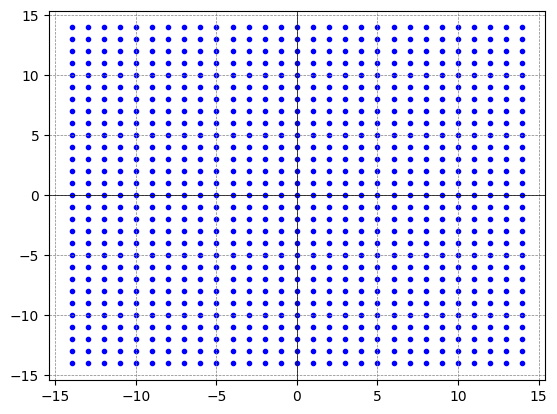

In [12]:
import matplotlib.pyplot as plt

def create_grid(n):
    """원점을 기준으로 한 격자점 생성"""
    x_points = list(range(-n, n + 1))
    y_points = list(range(-n, n + 1))

    # 격자 생성
    grid_points = [(x, y) for x in x_points for y in y_points]

    return grid_points

def plot_grid(grid_points):
    """격자점을 시각화"""
    x_values, y_values = zip(*grid_points)
    plt.scatter(x_values, y_values, marker='.', color='blue')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.show()

# 격자의 크기 설정 (예: 3x3 격자)
grid_size = 14

# 격자 생성
grid_points = create_grid(grid_size)

# 격자 시각화
plot_grid(grid_points)

In [13]:
pix = np.array(grid_points)

In [14]:
pix

array([[-14, -14],
       [-14, -13],
       [-14, -12],
       ...,
       [ 14,  12],
       [ 14,  13],
       [ 14,  14]])

In [15]:
x,y = np.array(grid_points)[0]

In [16]:
x,y

(-14, -14)

In [67]:
h_img = 28
w_img = 28
h_proj_4 = 28
w_proj_4 = 28

point_2d = []
point_3d = []
k_list = []
for i in pix:
    sphere = project(i,h_img, w_img, h_proj_4, w_proj_4)
    point_2d.append(i)
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)
print("k = ", k_list)

x,y,z =  -14 -14 0
r =  6  k =  0.2687
size_pix =  6.000519464179747
x,y,z =  -14 -13 0
r =  6  k =  0.2829
size_pix =  5.999908056795537
x,y,z =  -14 -12 0
r =  6  k =  0.2975
size_pix =  5.999752078211232
x,y,z =  -14 -11 0
r =  6  k =  0.3124
size_pix =  6.00042693147746
x,y,z =  -14 -10 0
r =  6  k =  0.3273
size_pix =  6.000327291073378
x,y,z =  -14 -9 0
r =  6  k =  0.342
size_pix =  5.999486978067375
x,y,z =  -14 -8 0
r =  6  k =  0.3564
size_pix =  5.9995723047563985
x,y,z =  -14 -7 0
r =  6  k =  0.3702
size_pix =  6.0002406251749605
x,y,z =  -14 -6 0
r =  6  k =  0.383
size_pix =  6.000255327900638
x,y,z =  -14 -5 0
r =  6  k =  0.3945
size_pix =  5.999753432433704
x,y,z =  -14 -4 0
r =  6  k =  0.4045
size_pix =  6.000067416287921
x,y,z =  -14 -3 0
r =  6  k =  0.4126
size_pix =  5.999910602667343
x,y,z =  -14 -2 0
r =  6  k =  0.4186
size_pix =  5.99994418640707
x,y,z =  -14 -1 0
r =  6  k =  0.4223
size_pix =  6.000151322258465
x,y,z =  -14 0 0
r =  6  k =  0.4235
size_pix

In [68]:
point_3d[0]

array([-0.62691239, -0.62691239,  0.46255995])

In [69]:
back_poind_3d = point_3d[0] * 6 / k_list[0]

In [70]:
back_poind_3d

array([-13.99878802, -13.99878802,  10.32884152])

In [71]:
back_poind_3d = np.array([round(back_poind_3d[0]), round(back_poind_3d[1]), 0])

In [72]:
back_poind_3d

array([-14, -14,   0])

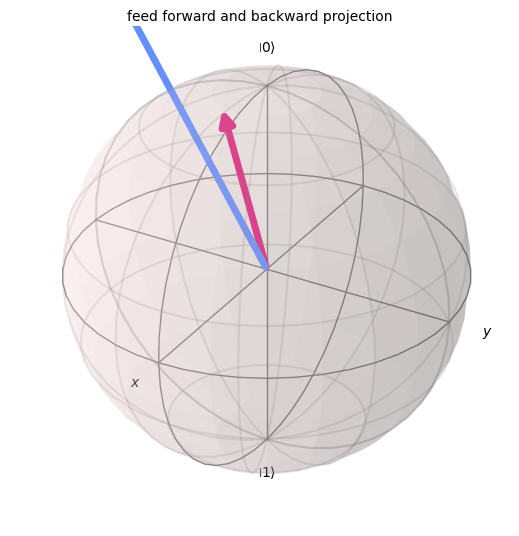

In [73]:
point_3d[0]
back_poind_3d
plot_bloch_vector([point_3d[0]]+[back_poind_3d], title = "feed forward and backward projection")

[array([-0.62691239, -0.62691239,  0.46255995]), array([-0.66011012, -0.61295939,  0.43420665]), array([-0.69419535, -0.59502459,  0.40501674]), array([-0.72888147, -0.57269258,  0.3751733 ]), array([-0.76365834, -0.54547025,  0.34538116]), array([-0.79806824, -0.51304387,  0.31602702]), array([-0.83165928, -0.47523388,  0.28722047]), array([-0.86376536, -0.43188268,  0.25958959]), array([-0.89362864, -0.3829837 ,  0.23399004]), array([-0.92053783, -0.32876351,  0.21100867]), array([-0.94382273, -0.26966364,  0.19099785]), array([-0.96274768, -0.20630307,  0.1748026 ]), array([-0.97674242, -0.13953463,  0.16280151]), array([-0.98534182, -0.07038156,  0.15539608]), array([-0.9882248,  0.       ,  0.153009 ]), array([-0.98534182,  0.07038156,  0.15539608]), array([-0.97674242,  0.13953463,  0.16280151]), array([-0.96274768,  0.20630307,  0.1748026 ]), array([-0.94382273,  0.26966364,  0.19099785]), array([-0.92053783,  0.32876351,  0.21100867]), array([-0.89362864,  0.3829837 ,  0.233990

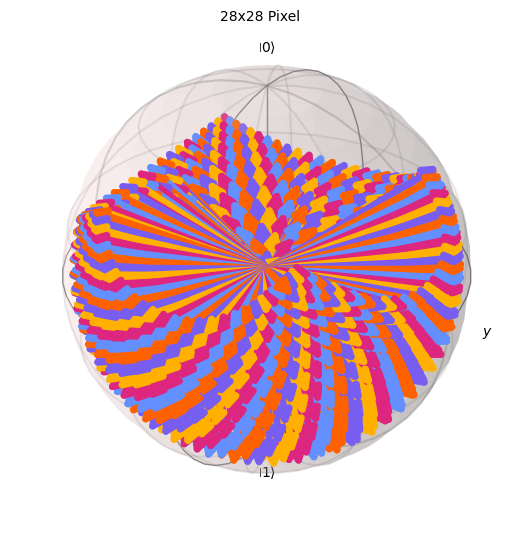

In [74]:
print(point_3d)

plot_bloch_vector(point_3d[:], title = "28x28 Pixel")

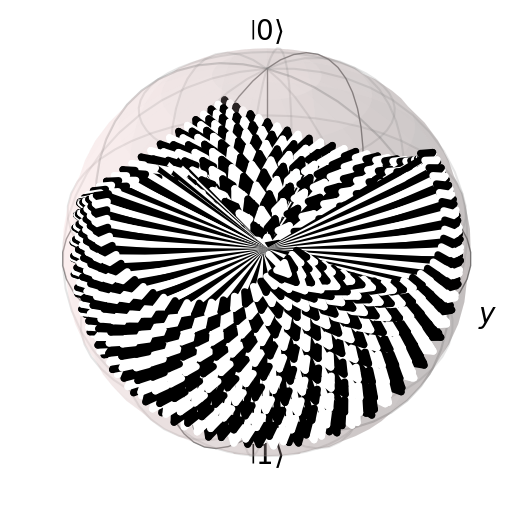

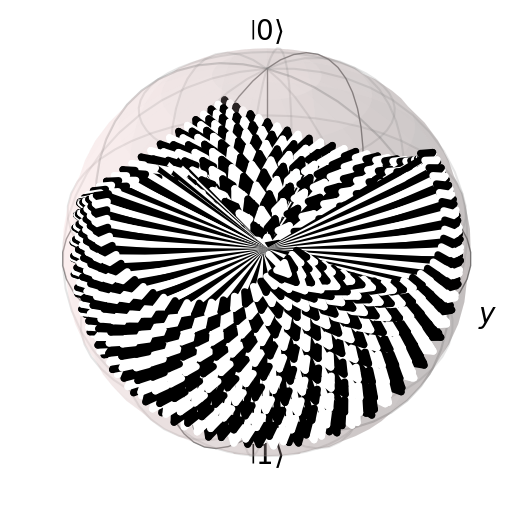

In [77]:
from qiskit.visualization.bloch import Bloch
_bloch = Bloch()
_bloch.vector_color = ['black','white']
_bloch.add_vectors(point_3d[:])
_bloch.render()
_bloch.fig

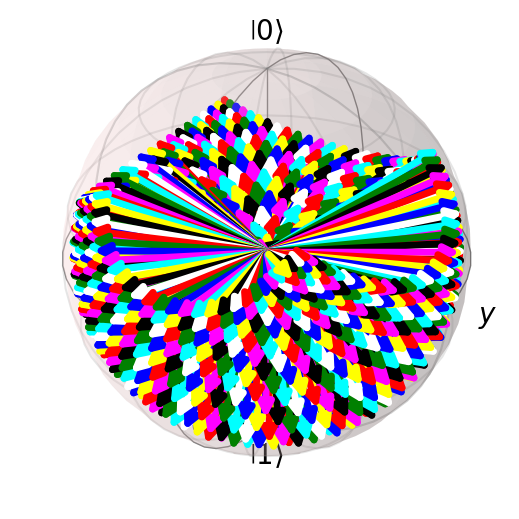

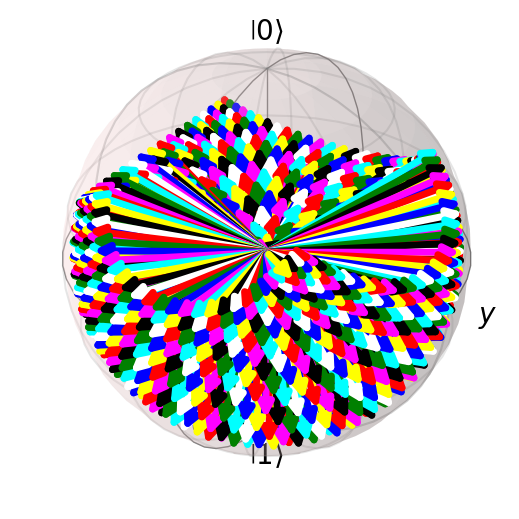

In [75]:
from qiskit.visualization.bloch import Bloch
_bloch = Bloch()
_bloch.vector_color = ['red','green','blue','magenta','cyan','yellow','black','white']
_bloch.add_vectors(point_3d[:])
_bloch.render()
_bloch.fig

In [40]:
import numpy as np
from math import sqrt
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector

-0.572822031784217 -0.572822031784217 0.5773502691896258 2.352257502659388


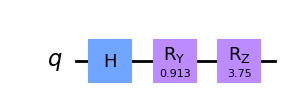

In [42]:
r, g, b = (1,1,255)
r, g, b = r/255, g/255, b/255
r, g, b = r-0.5, g-0.5, b-0.5

r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
print(r,g,b, np.arctan2(b,g))
theta = 2*2 * np.arctan2(sqrt(1-g**2-b**2),sqrt((g**2+b**2)))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(-(0.5*np.pi-theta),0)
qc.rz(phi,0)
qc.draw('mpl')


Statevector([-0.09622076-0.30824802j, -0.28201057+0.90343498j],
            dims=(2,))


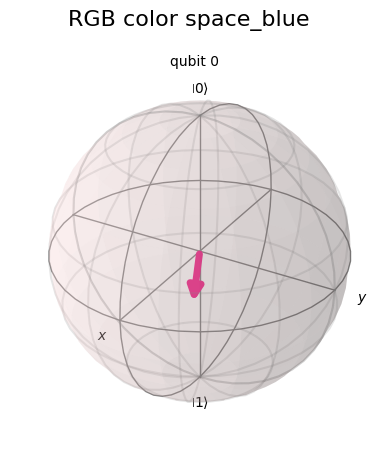

In [43]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_blue")

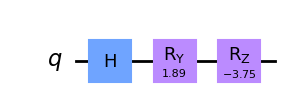

In [50]:
r, g, b = (255,1,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

Statevector([ 0.04755209-0.15093035j, -0.29671218-0.94176468j],
            dims=(2,))


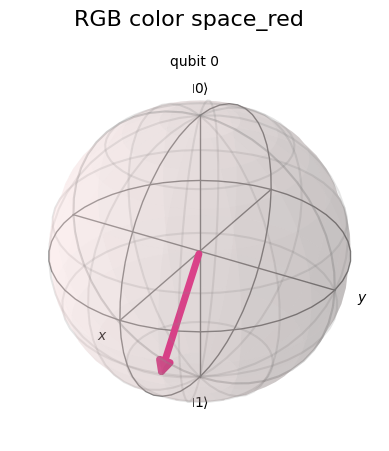

In [51]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_red")

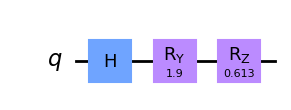

In [53]:
r, g, b = (1,255,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')


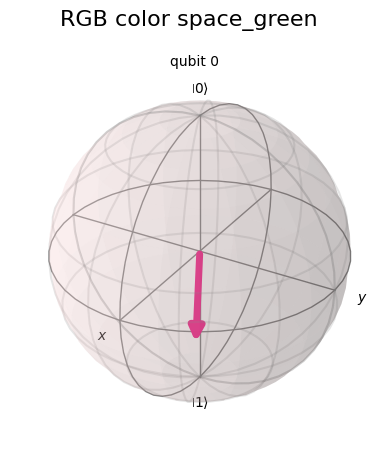

In [54]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state, title = "RGB color space_green")

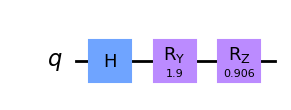

In [57]:
r, g, b = (255,1,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')


Statevector([-0.14716432+0.07161696j,  0.887054  +0.43168146j],
            dims=(2,))


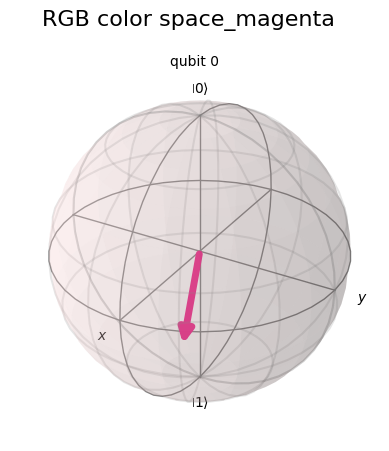

In [58]:
state = Statevector.from_instruction(qc)

print(state)
plot_bloch_multivector(state, title = "RGB color space_magenta")

Statevector([-0.07436901+0.15187077j,  0.43345434+0.8851677j ],
            dims=(2,))


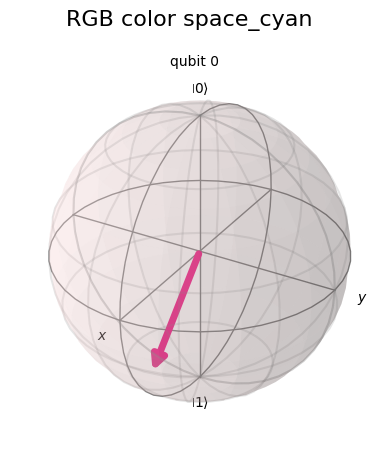

In [60]:
r, g, b = (1,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_cyan")

Statevector([0.25666183+0.52217458j, 0.35876209-0.72989601j],
            dims=(2,))


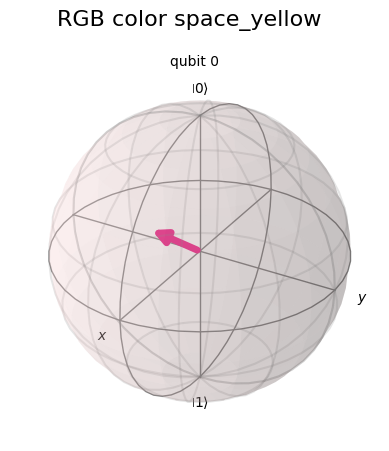

In [61]:
r, g, b = (255,255,1)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_yellow")

In [63]:
r, g, b = (255,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))


phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))

qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_white")

ValueError: ignored

Statevector([0.51449364+0.28115145j, 0.71087537-0.38846669j],
            dims=(2,))


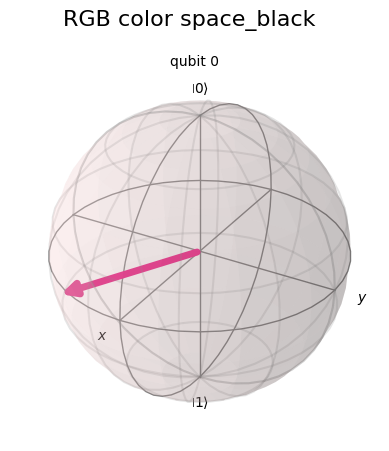

In [64]:
r, g, b = (1,1,1)
r, g, b = r/255, g/255, b/255
r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)

qc = QuantumCircuit(1)

theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_black")

In [67]:
for i in range(1,256):
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


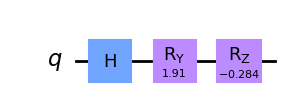

In [9]:
import qiskit
from math import sqrt
import numpy as np
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)

r, g, b = (255,255,255)
r, g, b = r/255, g/255, b/255

r, g, b = r-0.5, g-0.5, b-0.5
r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
qc.h(0)
theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1.1-r**2-g**2-b**2))
qc.ry(theta,0)
qc.rz(phi,0)

qc.draw('mpl')

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


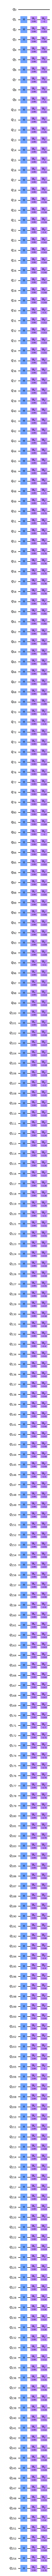

In [68]:
qc = QuantumCircuit(256)
for i in range(1,256):
  r, g, b = (i,1,1)
  r, g, b = r/255, g/255, b/255

  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
  qc.h(i)
  theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
  qc.ry(theta,i)
  qc.rz(phi,i)

qc.draw('mpl')

In [69]:
state = Statevector.from_instruction(qc)
print(state)
plot_bloch_multivector(state, title = "RGB color space_black")

ValueError: ignored

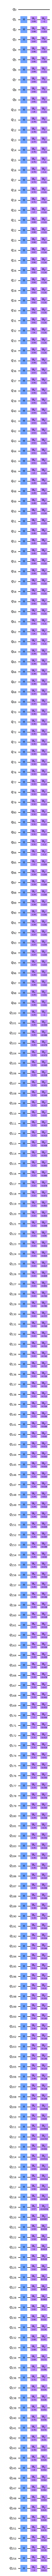

In [70]:
qc = QuantumCircuit(256)
for i in range(1,256):
  r, g, b = (1,i,1)
  r, g, b = r/255, g/255, b/255

  r, g, b = r-0.5, g-0.5, b-0.5
  r, g, b = 2 * r/np.sqrt(3), 2 *  g/np.sqrt(3), 2 * b/np.sqrt(3)
  qc.h(i)
  theta = 2 * np.arctan2(sqrt((g**2+b**2)),sqrt(1-g**2-b**2))
  phi = np.arctan2(b,g)-np.arctan2(r,sqrt(1-r**2-g**2-b**2))
  qc.ry(theta,i)
  qc.rz(phi,i)

qc.draw('mpl')